## Visualize Cell Health Predictions on Repurposing Hub Data

**Gregory Way, 2019**

In [1]:
suppressPackageStartupMessages(library(dplyr))
suppressPackageStartupMessages(library(ggplot2))

source(file.path("scripts", "visualize_utils.R"))

## Set Constants

In [2]:
consensus <- "modz"

output_dir <- file.path("figures", "umap", consensus)
dir.create(output_dir)

Warning message in dir.create(output_dir):
“'figures/umap/modz' already exists”

## Load and Process Data

In [3]:
# Load Data
data_dir <- file.path("repurposing_cellhealth_shiny", "data")
real_file <- file.path(
    data_dir,
    paste0("moa_cell_health_", consensus, ".tsv.gz")
)

cp_embedding_df <- readr::read_tsv(real_file, col_types = readr::cols())

cp_embedding_df <- cp_embedding_df %>%
    dplyr::mutate(Metadata_Treatment = "Compound")

cp_embedding_df$Metadata_Treatment[cp_embedding_df$Metadata_broad_core_id == "DMSO"] = "DMSO"

print(dim(cp_embedding_df))
head(cp_embedding_df, 3)

[1] 10368    88


Metadata_Plate_Map_Name Metadata_broad_core_id Metadata_broad_sample 
1 C-7161-01-LM6-001       BRD-A25234499          BRD-A25234499-001-18-3
2 C-7161-01-LM6-001       BRD-A25234499          BRD-A25234499-001-18-3
3 C-7161-01-LM6-001       BRD-A25234499          BRD-A25234499-001-18-3
  Metadata_dose_recode Metadata_mmoles_per_liter Metadata_pert_well umap_x   
1 6                    10.0000                   B13                -1.580029
2 5                     3.3333                   B14                -1.904766
3 4                     1.1111                   B15                -1.899164
  umap_y     broad_id      pert_iname        ⋯
1 -0.9219316 BRD-A25234499 aminoglutethimide ⋯
2 -2.4360995 BRD-A25234499 aminoglutethimide ⋯
3 -2.5914881 BRD-A25234499 aminoglutethimide ⋯
  cell_health_modz_target_cc_g2_high_h2ax
1 0.2751957                              
2 0.5169502                              
3 0.4012496                              
  cell_health_modz_target_cc_late_mitosis_n_spots_h2ax_mean
1 0.2319843                                                
2 0.2421589                                                
3 0.2682545                                                
  cell_health_modz_target_cc_cc_high_h2ax
1 0.03473731                             
2 0.01257728                             
3 0.08088620                             
  cell_health_modz_target_vb_percent_dead_only
1 0.2267767                                   
2 0.6328903                                   
3 0.2074322                                   
  cell_health_modz_target_cc_s_high_h2ax
1 0.237375                              
2 0.399858                              
3 0.337209                              
  cell_health_modz_target_cc_cc_n_spots_h2ax_per_nucleus_area_mean
1 0.10548474                                                      
2 0.02291539                                                      
3 0.18061697                                                      
  cell_health_modz_target_cc_s_n_spots_h2ax_per_nucleus_area_mean
1 0.1536775                                                      
2 0.2027969                                                      
3 0.2859738                                                      
  cell_health_modz_target_cc_g1_plus_g2_count
1 -0.5309856                                 
2 -0.1597692                                 
3 -0.2541855                                 
  cell_health_modz_target_vb_live_cell_width_length Metadata_Treatment
1  0.14445485                                       Compound          
2 -0.29454513                                       Compound          
3 -0.04831094                                       Compound

## Visualize Metadata and Cell Health Variables

Warning message:
“Using size for a discrete variable is not advised.”

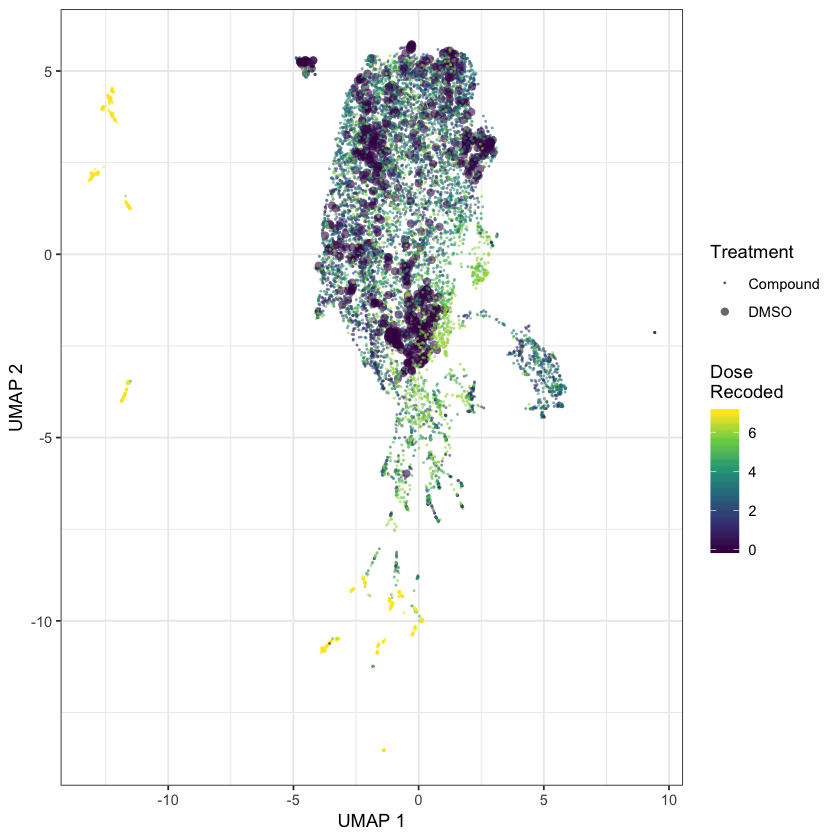

In [4]:
ggplot(cp_embedding_df,
       aes(x = umap_x, y = umap_y)) +
    geom_point(aes(color = Metadata_dose_recode,
                   size = paste(Metadata_Treatment)),
               pch = 16,
               alpha = 0.6) +
    theme_bw() +
    scale_color_viridis_c(name = "Dose\nRecoded") +
    scale_size_discrete("Treatment",
                        range = c(0.5, 2)) +
    xlab("UMAP 1") +
    ylab("UMAP 2")

output_file <- file.path(
    output_dir,
    paste0("umap_repurposing_cell_painting_dose_consensus_", consensus, ".png")
)
ggsave(output_file, height = 5, width = 6, dpi = 500)

Warning message:
“Using size for a discrete variable is not advised.”

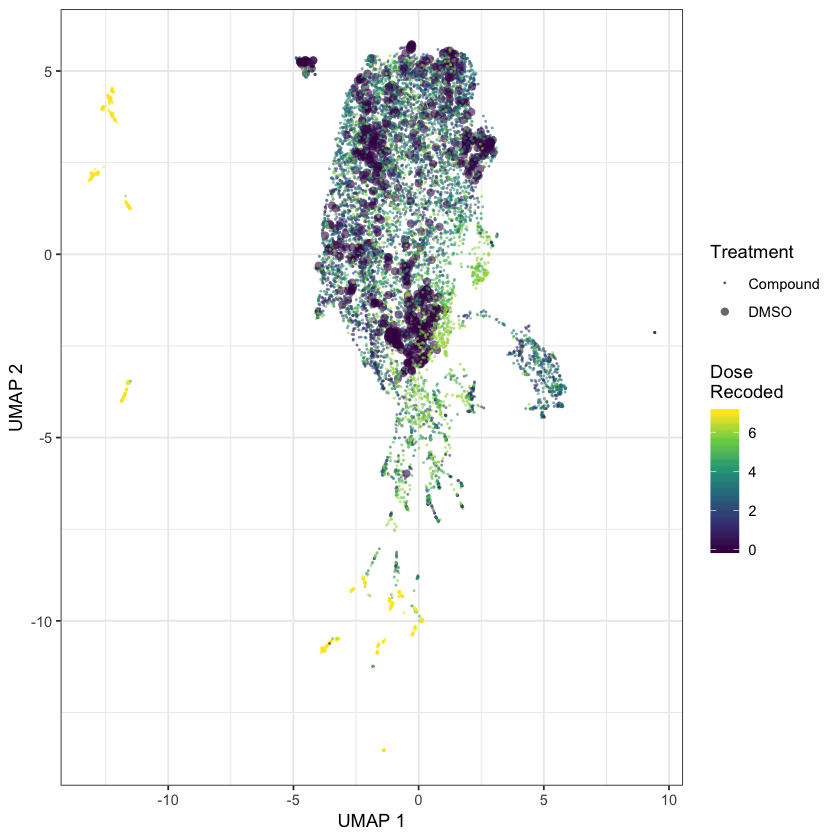

In [5]:
ggplot(cp_embedding_df,
       aes(x = umap_x, y = umap_y)) +
    geom_point(aes(color = Metadata_dose_recode,
                   size = paste(Metadata_Treatment)),
               pch = 16,
               alpha = 0.6) +
    theme_bw() +
    scale_color_viridis_c(name = "Dose\nRecoded") +
    scale_size_discrete("Treatment",
                        range = c(0.5, 2)) +
    xlab("UMAP 1") +
    ylab("UMAP 2")

output_file <- file.path(
    output_dir,
    paste0("umap_repurposing_cell_painting_dose_consensus_", consensus, ".png")
)
ggsave(output_file, height = 5, width = 6, dpi = 500)

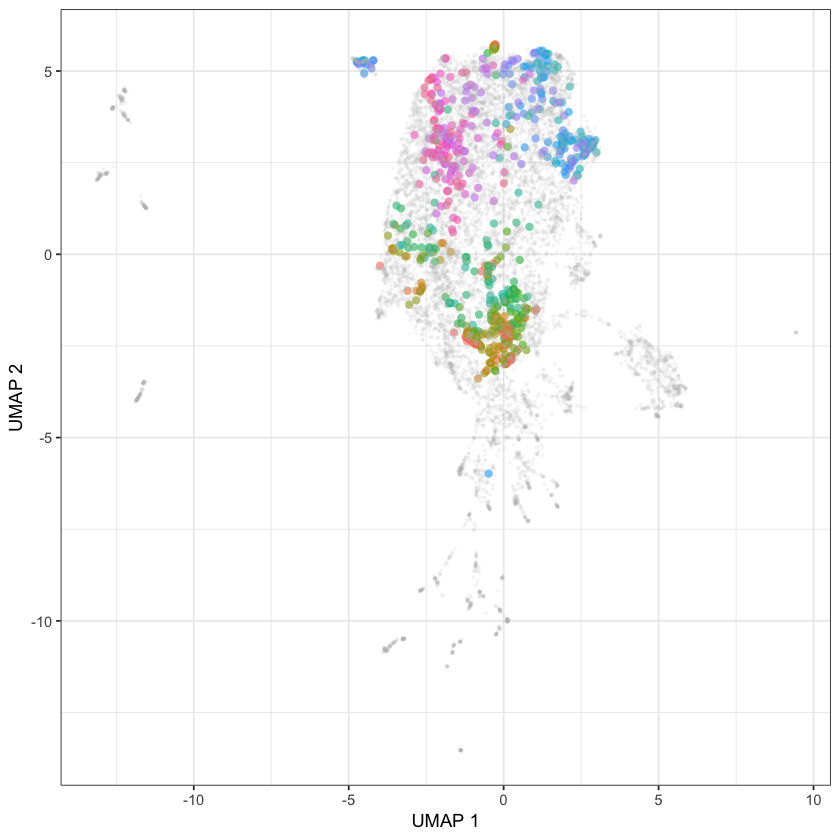

In [6]:
ggplot(cp_embedding_df %>% dplyr::filter(Metadata_Treatment == "DMSO"),
       aes(x = umap_x, y = umap_y)) +
    geom_point(aes(color = Metadata_pert_well),
               pch = 16,
               size = 2,
               alpha = 0.6) +
    geom_point(data = cp_embedding_df,
               color = "grey",
               alpha = 0.1,
               size = 0.5) +
    theme_bw() +
    theme(legend.position = "none") +
    xlab("UMAP 1") +
    ylab("UMAP 2")

output_file <- file.path(
    output_dir,
    paste0("umap_repurposing_cell_painting_dose_consensus_dmso_", consensus, ".png")
)

ggsave(output_file, height = 5, width = 6, dpi = 500)

## Certain Models had Better Performance in A549

We applied all models to the Drug Repurposing Set data.

Here, output visualizations of several of the top models.

![Performance Rank](../3.train/figures/cell_line_performance/modz/ranked_models_A549_modz.png)

In [7]:
# Load feature mapping
mapping_dir <- file.path("..", "1.generate-profiles", "data", "labels")
mapping_file <- file.path(mapping_dir, "feature_mapping_annotated.csv")
map_df <- readr::read_csv(
    mapping_file,
    col_types = readr::cols(.default = readr::col_character())
)

print(dim(map_df))
tail(map_df, 3)

[1] 75 16


id                     readable_name       original_name    feature_type
1 cc_g2_g1_count         Cell Count - G2/G1  G2/G1            cell_cycle  
2 cc_g1_plus_g2_count    Cell Count - G1+G2  G1+G2            cell_cycle  
3 cc_g2_plus_all_m_count Cell Count - G2 + M G2 + All M-phase cell_cycle  
  measurement      gate_required assay           hoechst edu ph3 gh2ax caspase
1 cell_cycle_count 1             hoechst_edu_ph3 1       1   1   0     0      
2 cell_cycle_count 1             hoechst_edu_ph3 1       1   1   0     0      
3 cell_cycle_count 1             hoechst_edu_ph3 1       1   1   0     0      
  draq7 cell_rox dpc description
1 0     0        0   G2/G1      
2 0     0        0   G1+G2      
3 0     0        0   G2+M

## Visualizing Specific Cell Health Models

Only a few are shown here, but all are saved in a separate folder.

### Predicting Number of Live Cells

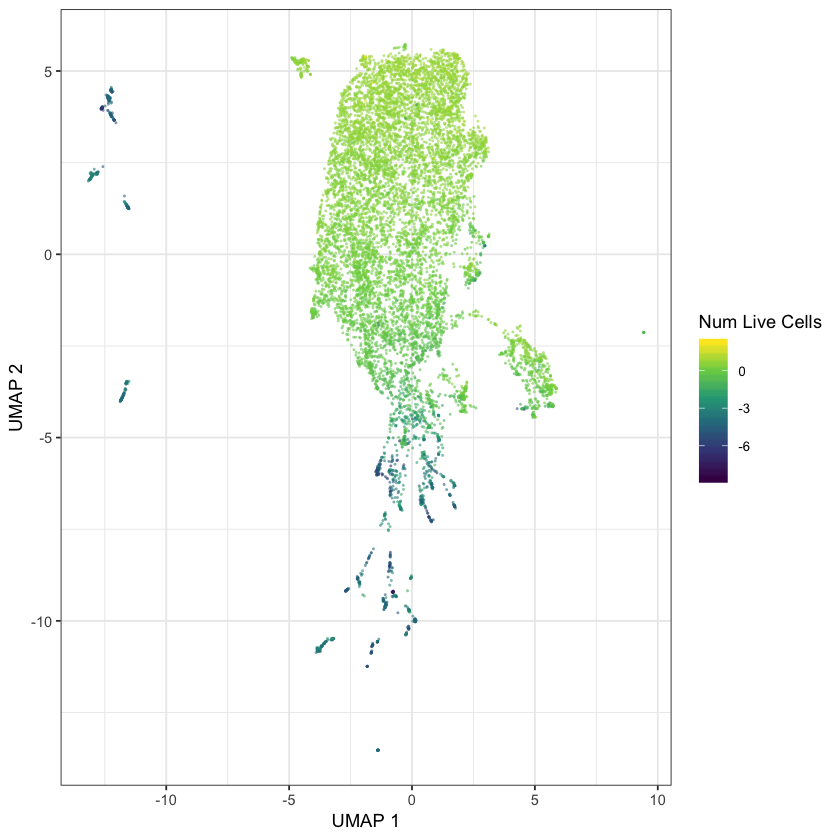

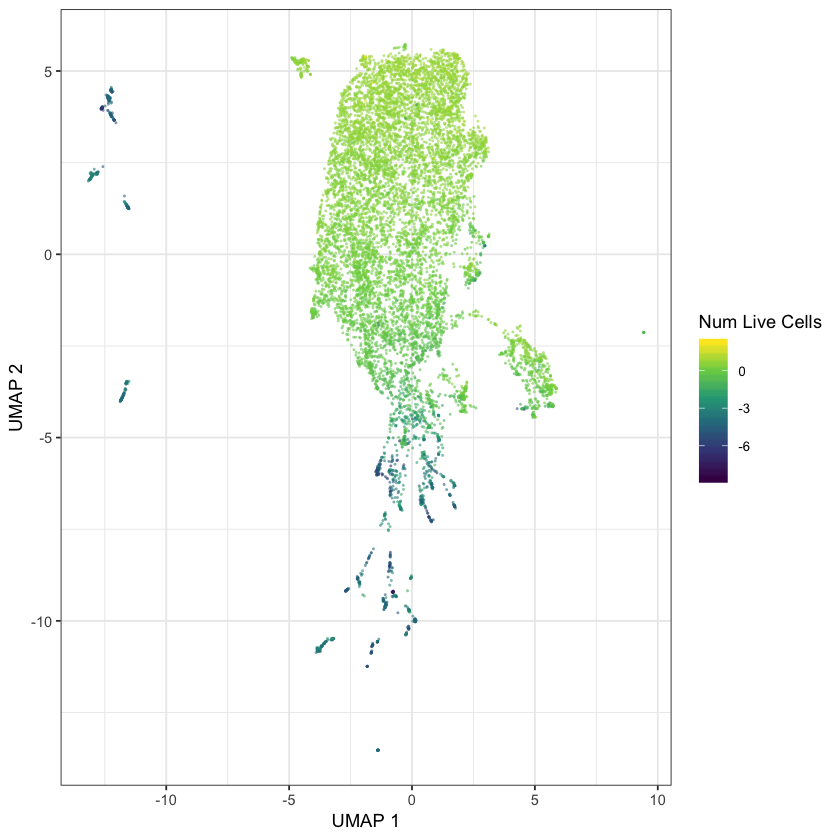

In [8]:
visualize_umap(
    cp_embedding_df,
    target_variable = "cell_health_modz_target_vb_num_live_cells",
    legend_title = "Num Live Cells",
    output_dir = "none",
    save = FALSE
)

### Predicting Live Width:Length

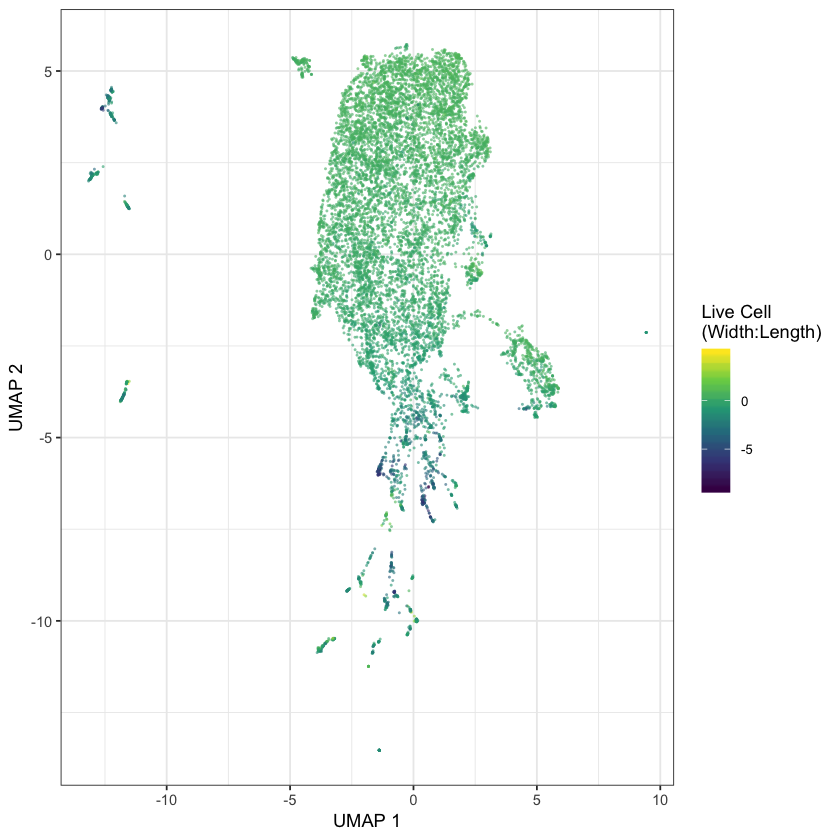

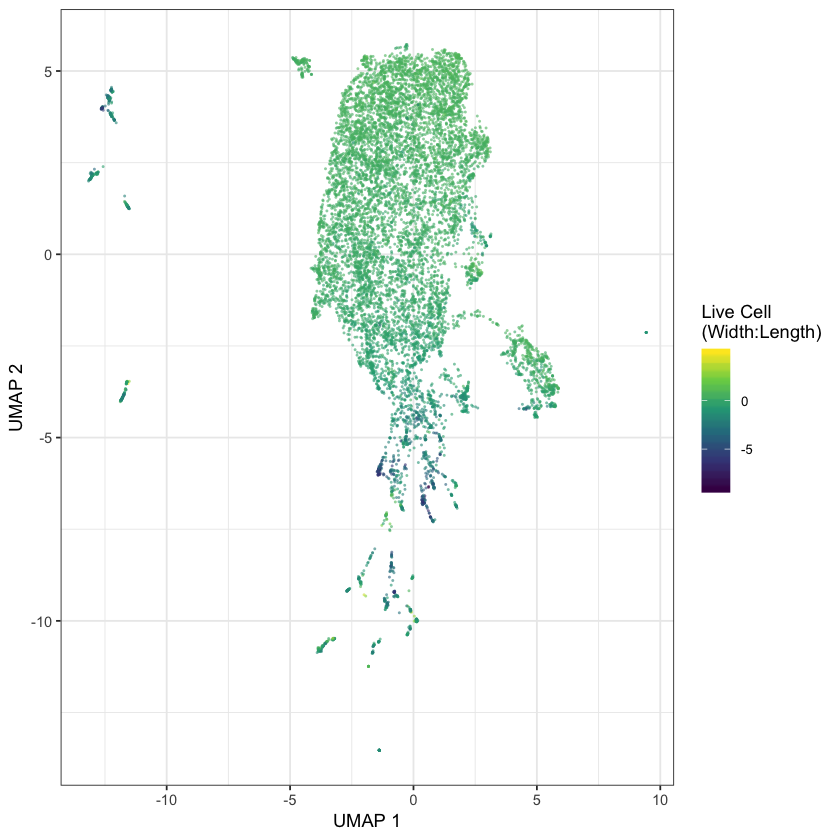

In [9]:
visualize_umap(
    cp_embedding_df,
    target_variable = "cell_health_modz_target_vb_live_cell_width_length",
    legend_title = "Live Cell\n(Width:Length)",
    output_dir = "none",
    save = FALSE
)

### Predicting Live Cell Roundness

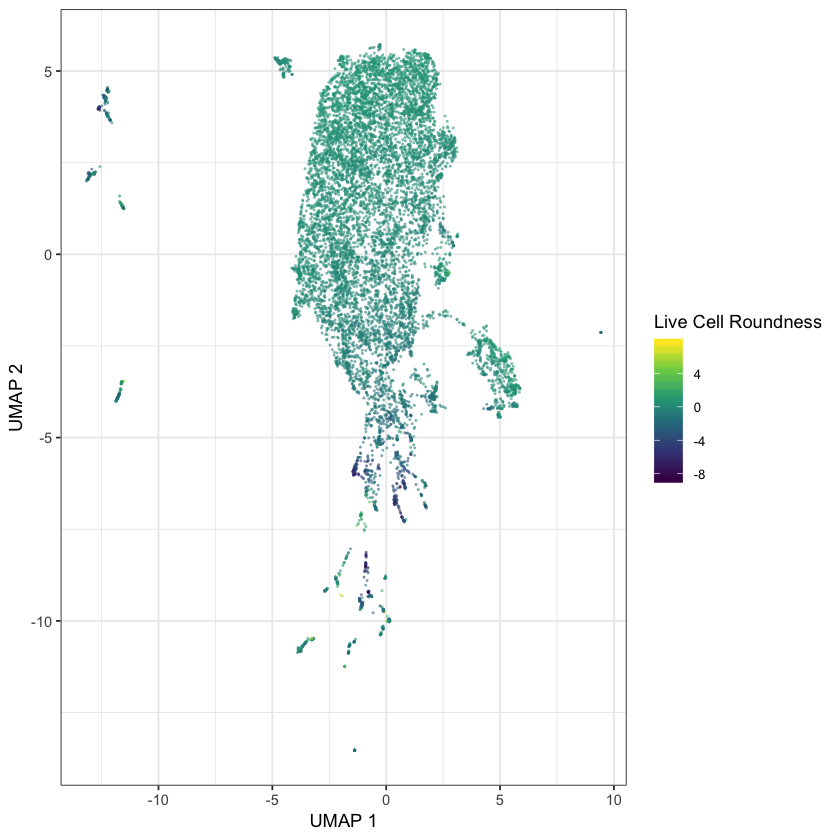

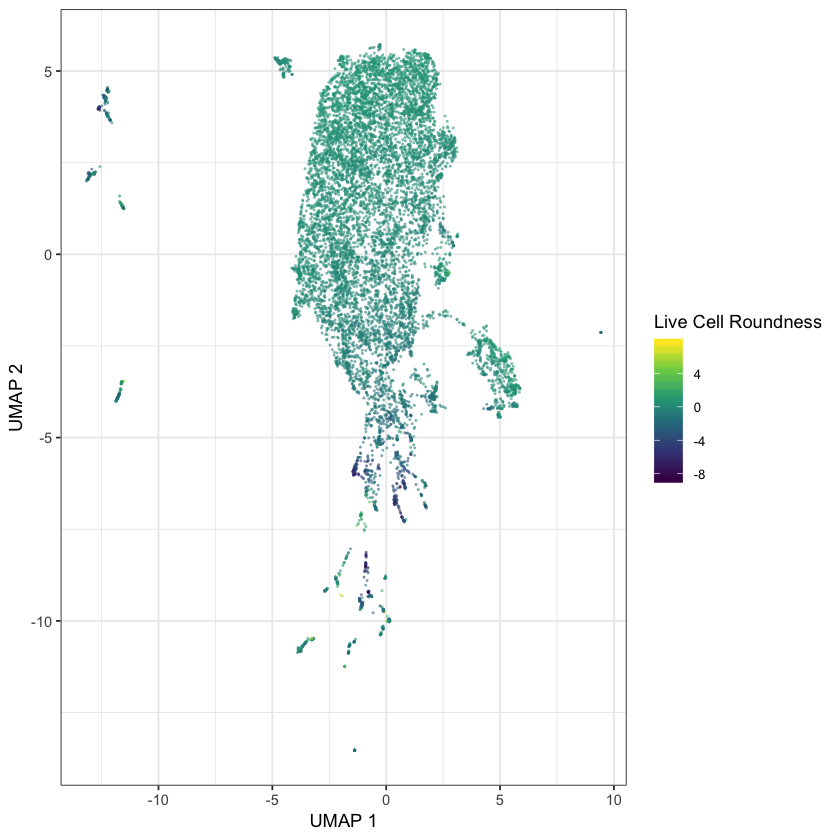

In [10]:
visualize_umap(
    cp_embedding_df,
    target_variable = "cell_health_modz_target_vb_live_cell_roundness",
    legend_title = "Live Cell Roundness",
    output_dir = "none",
    save = FALSE
)

### Predicting Number of Objects

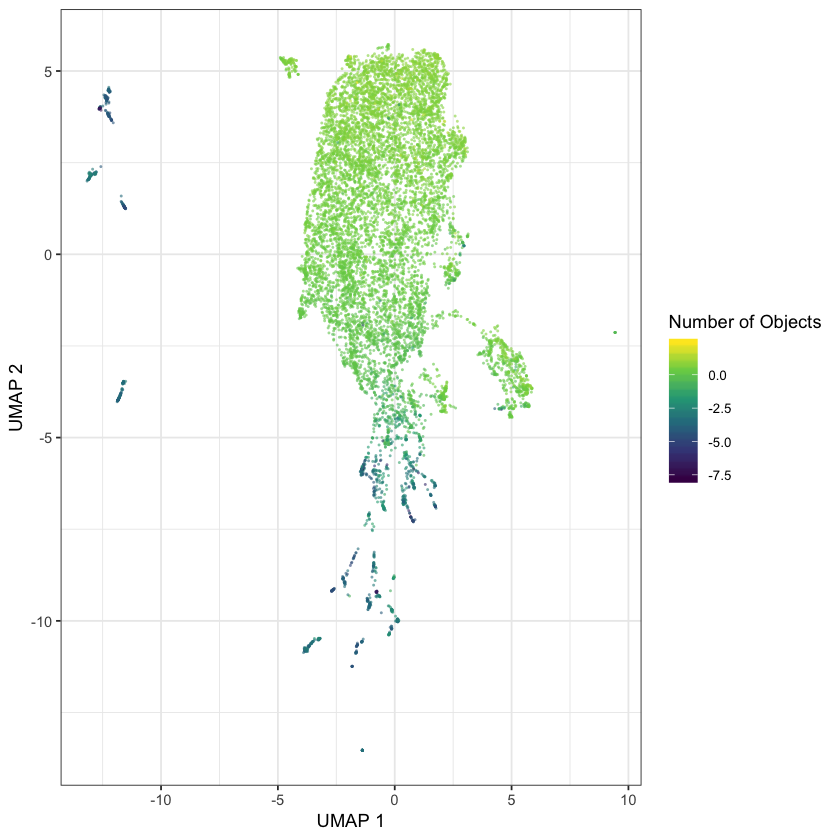

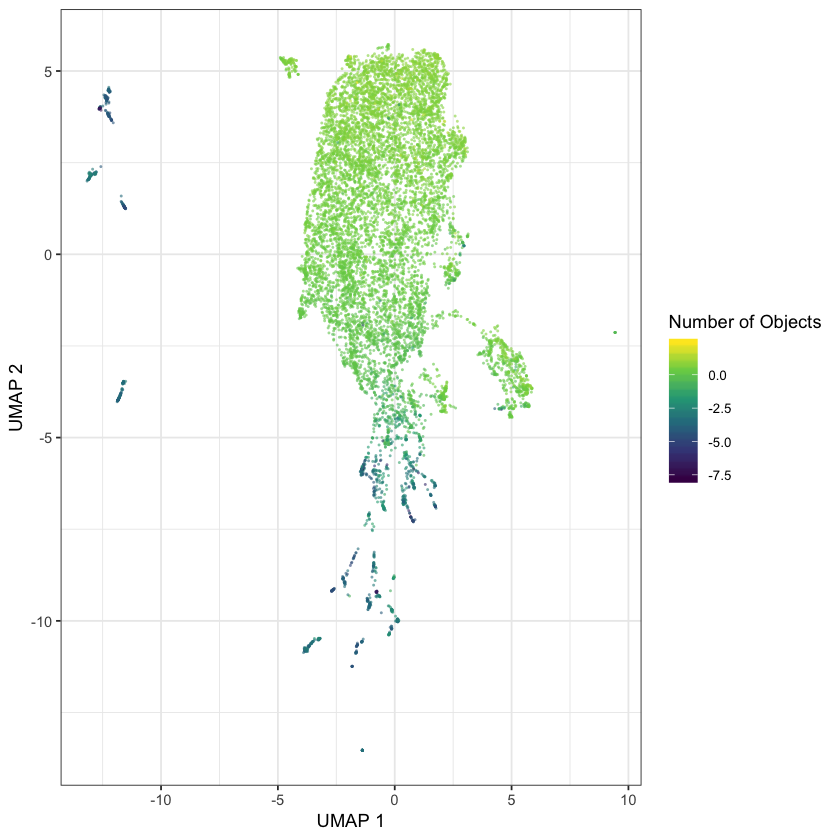

In [11]:
visualize_umap(
    cp_embedding_df,
    target_variable = "cell_health_modz_target_cc_all_n_objects",
    legend_title = "Number of Objects",
    output_dir = "none",
    save = FALSE
)

### Predicting Live Cell Area

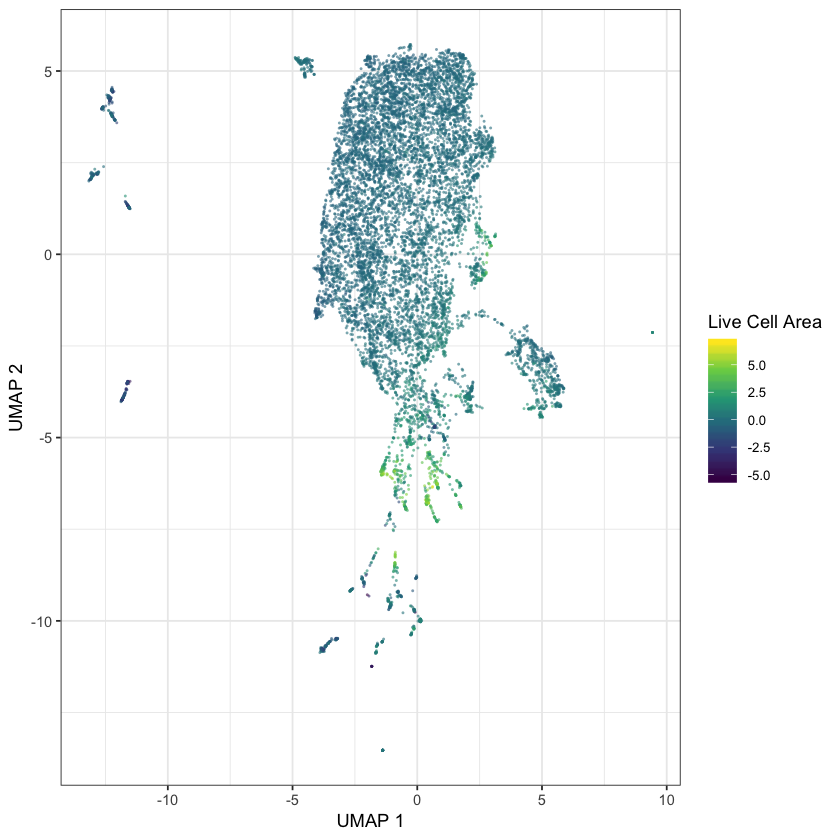

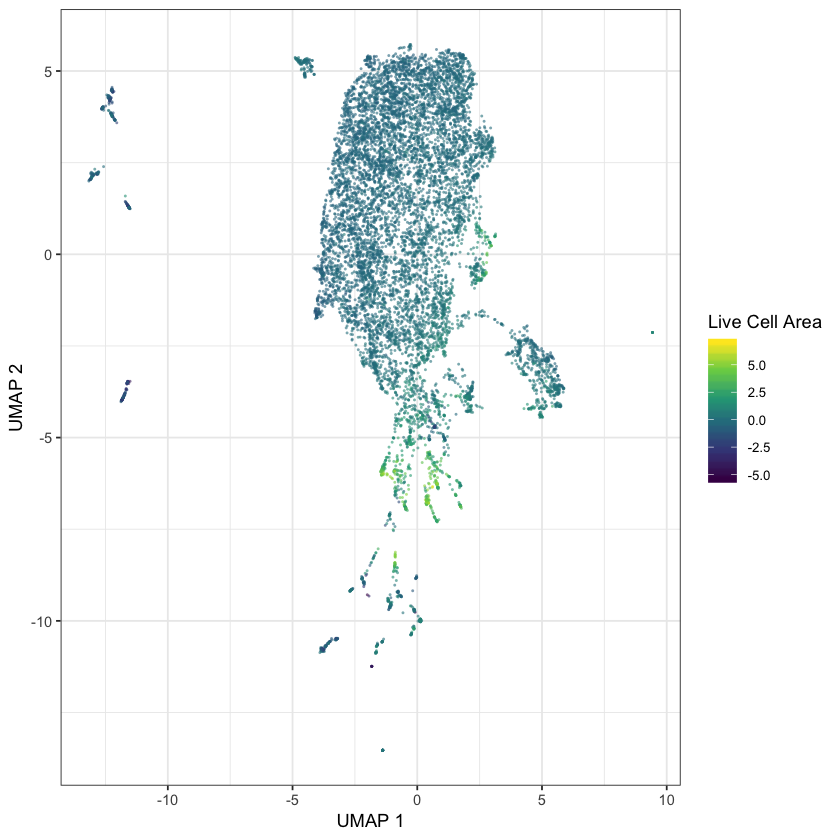

In [12]:
visualize_umap(
    cp_embedding_df,
    target_variable = "cell_health_modz_target_vb_live_cell_area",
    legend_title = "Live Cell Area",
    output_dir = "none",
    save = FALSE
)

### Predicting Number of Objects in Cell Cycle Stage

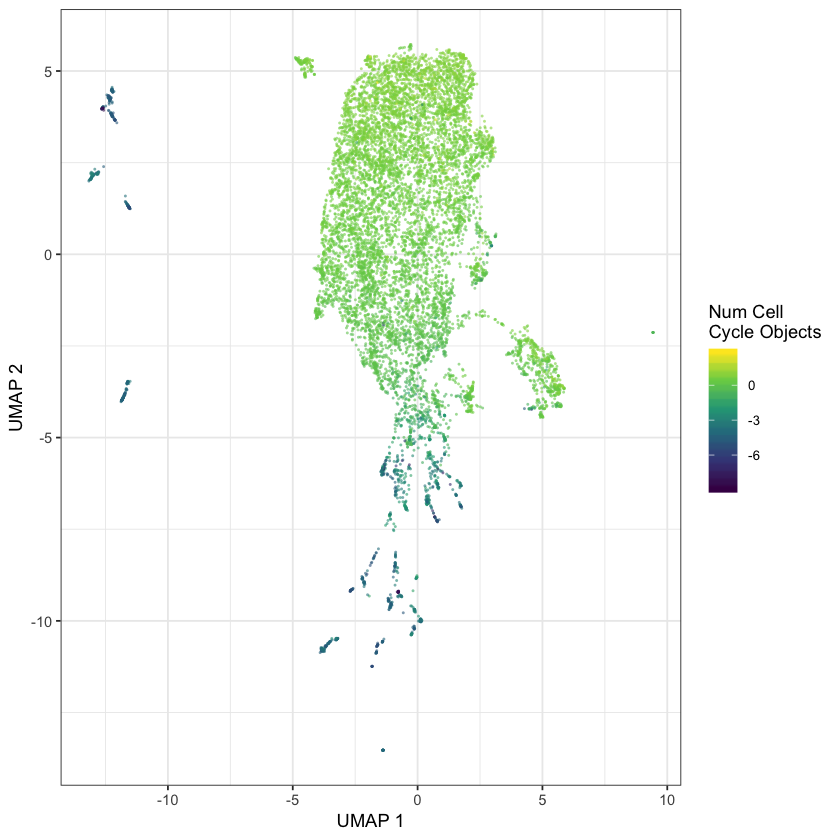

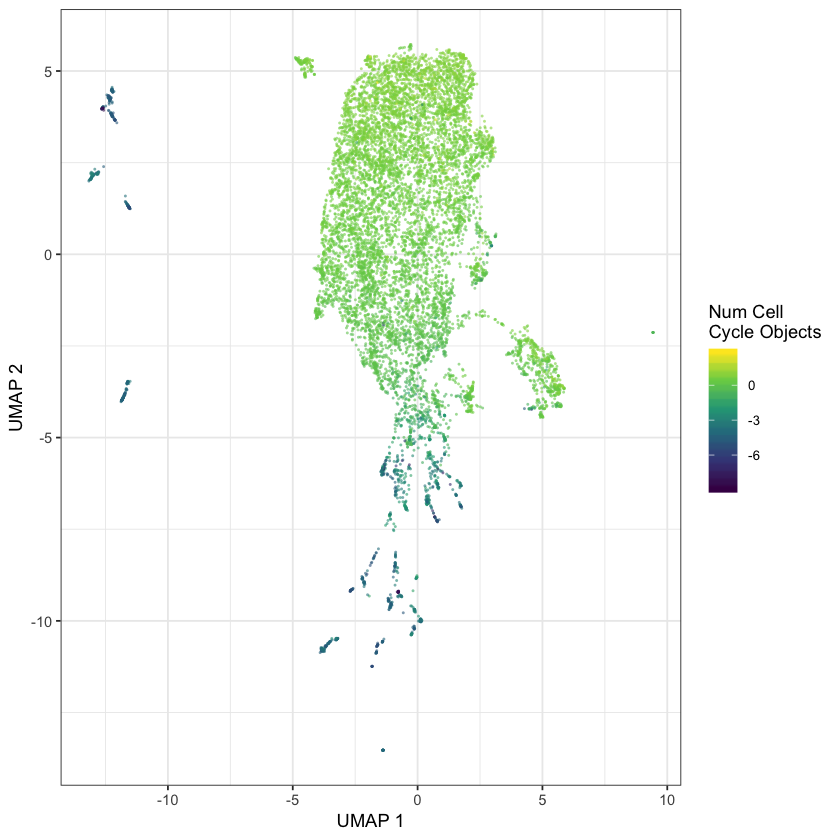

In [13]:
visualize_umap(
    cp_embedding_df,
    target_variable = "cell_health_modz_target_cc_cc_n_objects",
    legend_title = "Num Cell\nCycle Objects",
    output_dir = "none",
    save = FALSE
)

### Predicting Number of Objects in G1

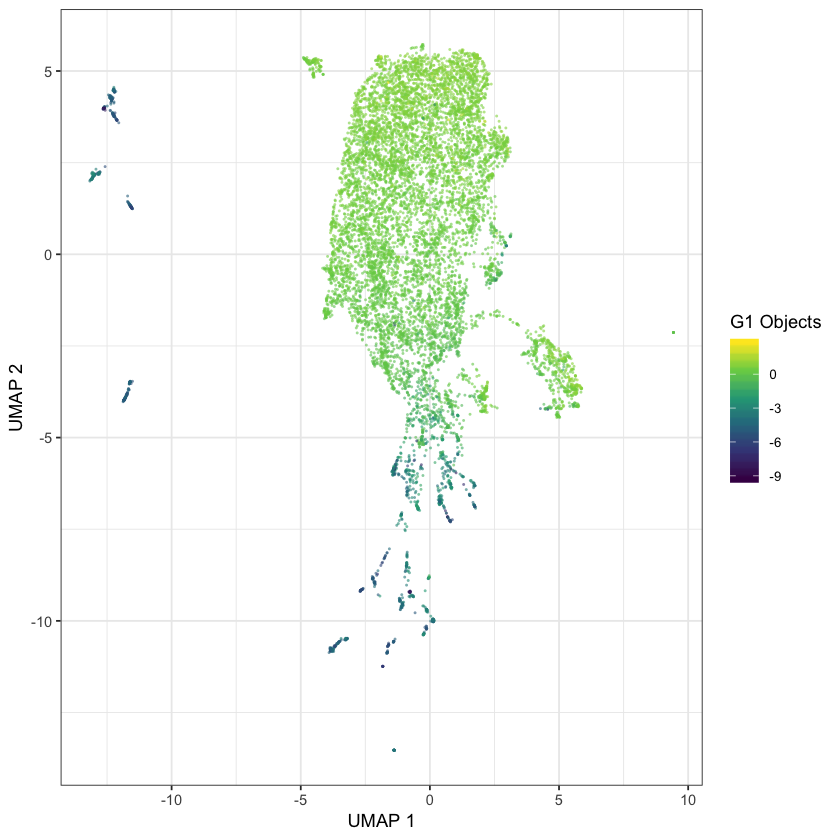

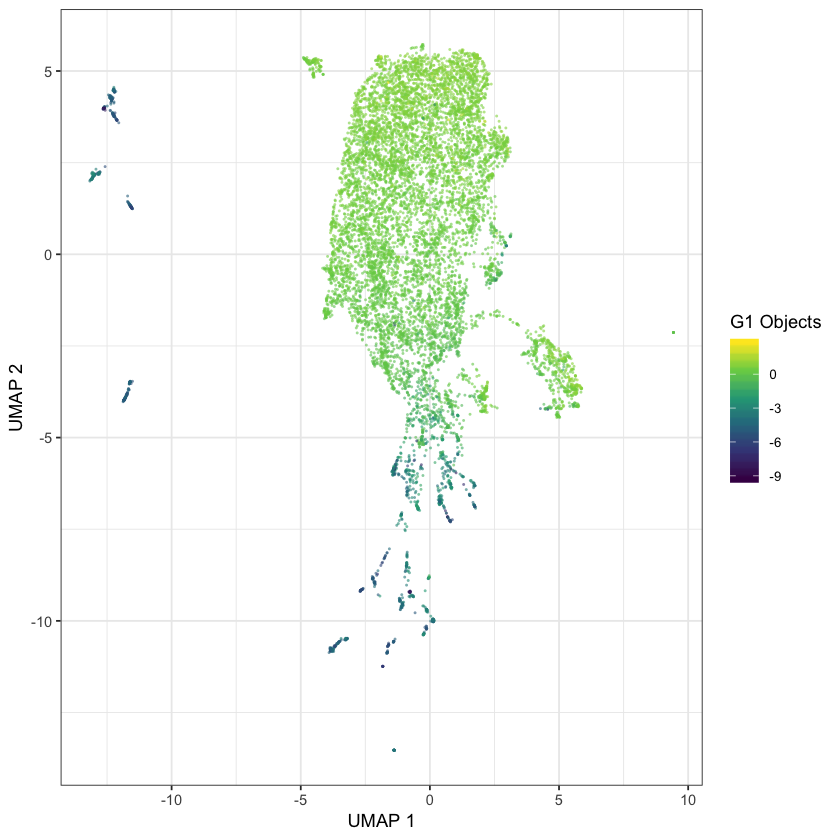

In [14]:
visualize_umap(
    cp_embedding_df,
    target_variable = "cell_health_modz_target_cc_g1_n_objects",
    legend_title = "G1 Objects",
    output_dir = "none",
    save = FALSE
)

### Predicting EdU positive intensity

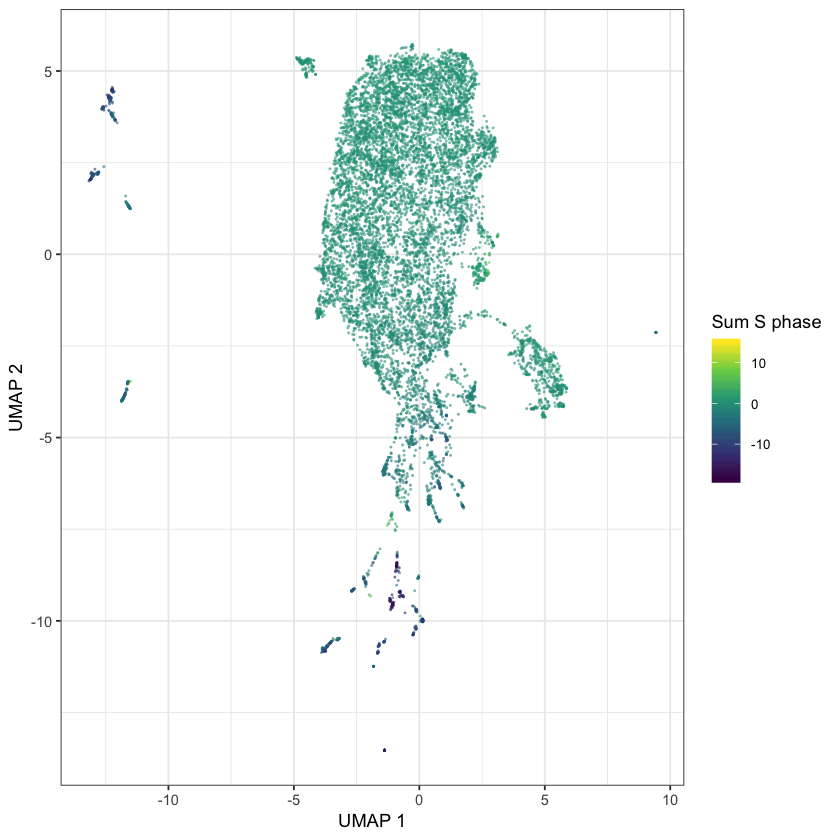

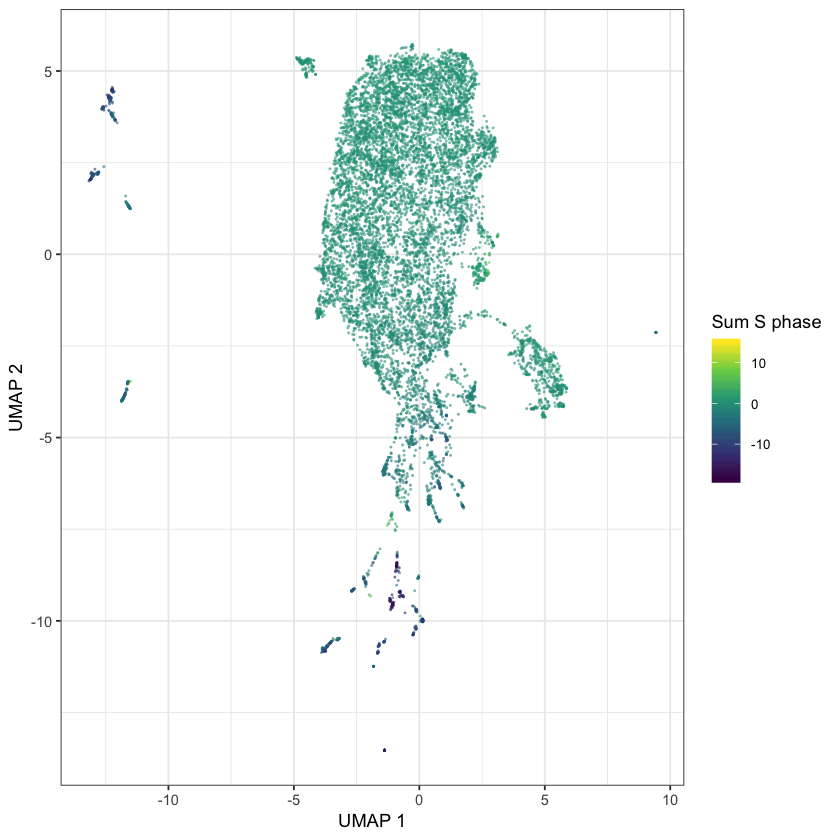

In [15]:
visualize_umap(
    cp_embedding_df,
    target_variable = "cell_health_modz_target_cc_s_intensity_nucleus_area_mean",
    legend_title = "Sum S phase",
    output_dir = "none",
    save = FALSE
)

### Predicting ROS

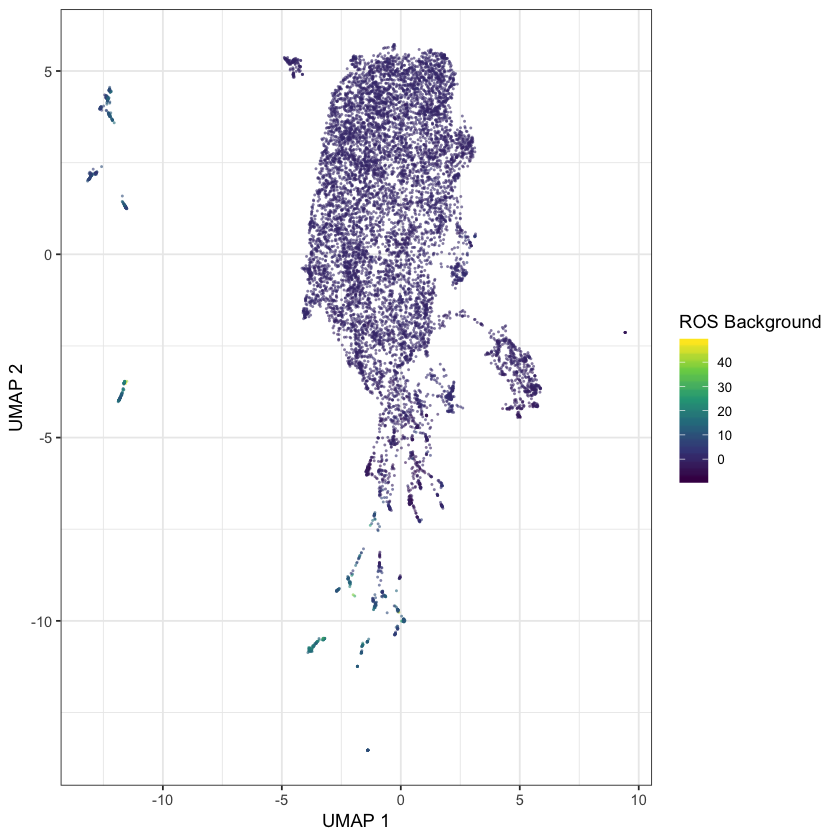

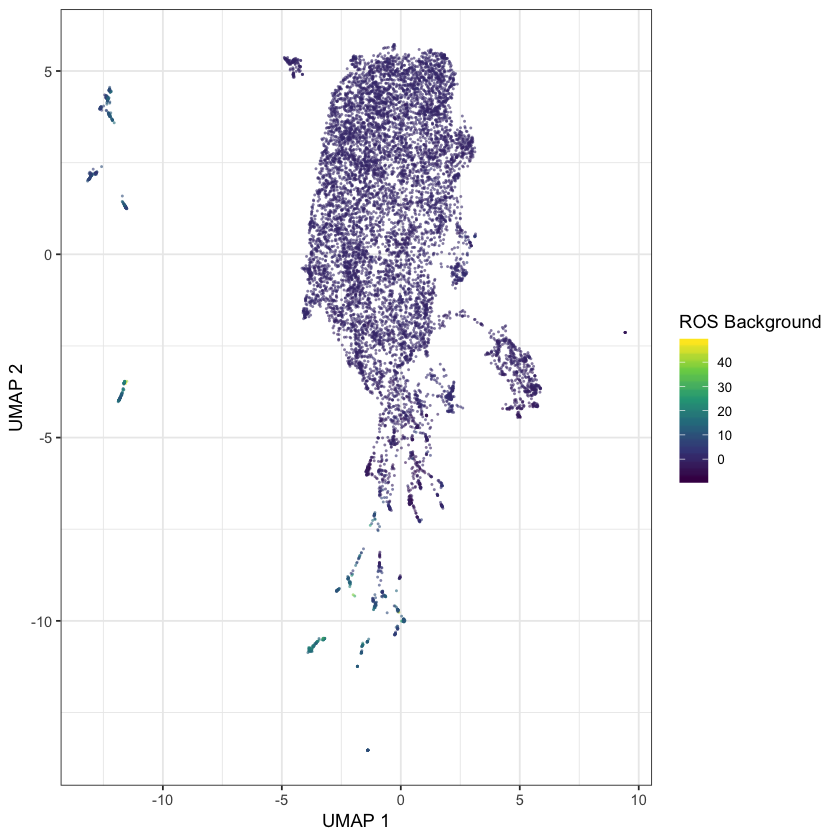

In [16]:
visualize_umap(
    cp_embedding_df,
    target_variable = "cell_health_modz_target_vb_ros_back_mean",
    legend_title = "ROS Background",
    output_dir = "none",
    save = FALSE
)

## Visualize All Cell Health Variables

In [17]:
cell_health_variables <- colnames(
    cp_embedding_df %>%
        dplyr::select(starts_with("cell_health_modz_target_"))
    )

length(cell_health_variables)

[1] 70

In [18]:
pdf_file <- file.path(
    output_dir,
    paste0("repurposing_hub_umaps_consensus_", consensus, ".pdf")
)
pdf(pdf_file, width = 5, height = 5, onefile = TRUE)

for (cell_health_variable in cell_health_variables) {
    umap_gg <- visualize_umap(
        df = cp_embedding_df,
        target_variable = cell_health_variable,
        legend_title = "Prediction:",
        title = cell_health_variable,
        dpi = 200,
        save_figure = FALSE
    )
}

dev.off()

pdf 
  2

## Visualize Model Scores on DMSO samples

In [19]:
assay_theme_file <- file.path("..", "3.train", "scripts", "assay_themes.R")
source(assay_theme_file)

In [20]:
col_types <- readr::cols(
    .default = readr::col_character(),
    shuffle_false = readr::col_double(),
    shuffle_true = readr::col_double()
)

rank_file <- file.path(
    "repurposing_cellhealth_shiny",
    "data",
    paste0("A549_ranked_models_regression_", consensus, ".tsv")
)
model_rank_df <- readr::read_tsv(rank_file, col_types = col_types)

# Recode the target variable
model_rank_df$target <- paste0("cell_health_", consensus, "_target_", model_rank_df$target)

head(model_rank_df, 3)

metric target                                            original_name      
1 r_two  cell_health_modz_target_vb_live_cell_width_length Live Width:Length  
2 r_two  cell_health_modz_target_vb_num_live_cells         # Live Cells       
3 r_two  cell_health_modz_target_vb_live_cell_roundness    Live Cell Roundness
  readable_name       feature_type measurement assay description         
1 Live Width / Length viability    shape       dpc   Width/Length        
2 # Live Cells        viability    death       draq  Number of live cells
3 Live Cell Roundness viability    shape       dpc   Cell Roundness      
  shuffle_false shuffle_true 
1 0.8916483      6.635413e-03
2 0.8811216     -5.934792e-06
3 0.8552069      2.012126e-01

In [21]:
dmso_embeddings_df <- cp_embedding_df %>%
    dplyr::filter(Metadata_Treatment == "DMSO")

non_dmso_embeddings_df <- cp_embedding_df %>%
    dplyr::filter(Metadata_Treatment != "DMSO")

In [22]:
std_dev_dmso_features <- apply(
    dmso_embeddings_df %>% 
        dplyr::select(matches("cell_health_modz_target")),
    2,
    sd
)
std_dev_compound_features <- apply(
    non_dmso_embeddings_df %>%
        dplyr::select(matches("cell_health_modz_target")),
    2, 
    sd
)

In [23]:
std_dev_all_df <- dplyr::bind_cols(
    as.data.frame(std_dev_dmso_features),
    as.data.frame(std_dev_compound_features)
) %>%
    dplyr::mutate(
        features = colnames(dmso_embeddings_df %>%
                                dplyr::select(matches("cell_health_modz_target")))
    ) %>%
    dplyr::left_join(model_rank_df, by = c("features" = "target")) 

good_performing <- std_dev_all_df %>%
    dplyr::filter(shuffle_false > 0)

bad_performing <- std_dev_all_df %>%
    dplyr::filter(shuffle_false <= 0)

std_dev_good_df <- good_performing %>%
    dplyr::mutate(performance_scaled = (
        good_performing$shuffle_false - min(good_performing$shuffle_false)
    ) / (
        max(good_performing$shuffle_false) - min(good_performing$shuffle_false)
    )
                  )

print(dim(std_dev_good_df))
head(std_dev_good_df, 2)

[1] 37 13


std_dev_dmso_features std_dev_compound_features
1 0.05967878            0.2168907                
2 0.35065337            1.5849058                
  features                                                                  
1 cell_health_modz_target_cc_late_mitosis_n_spots_h2ax_per_nucleus_area_mean
2 cell_health_modz_target_cc_g1_n_objects                                   
  metric
1 r_two 
2 r_two 
  original_name                                                                   
1 pH3 neg, Hoechst cond (late mitosis) - Number of Spots per Area of Nucleus - ...
2 G1 - Number of Objects                                                          
  readable_name                                 feature_type measurement
1 Late M - # of gH2AX Spots per Area of Nucleus cell_cycle   dna_damage 
2 G1 - # cells                                  cell_cycle   g1_phase   
  assay                
1 hoechst_edu_ph3_gh2ax
2 hoechst_edu_ph3      
  description                                                     shuffle_false
1 In late M cells: average number of gH2Ax spots per nucleus area 0.01027311   
2 Number of G1 cells                                              0.77424668   
  shuffle_true performance_scaled
1 -0.08045787  0.001896058       
2  0.06178493  0.867049811

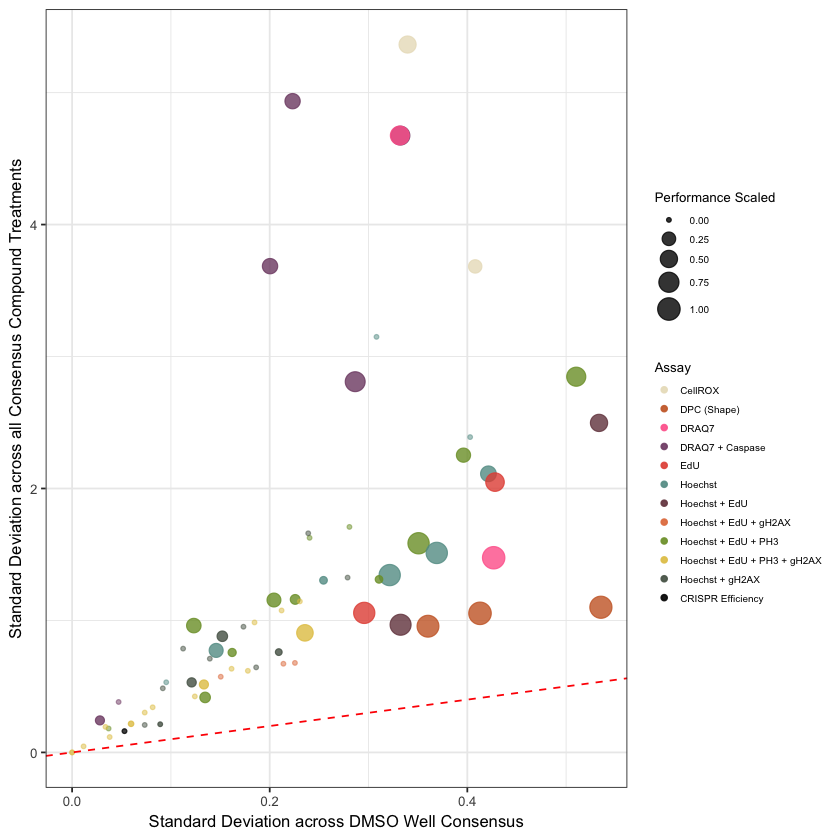

In [24]:
ggplot(std_dev_good_df,
       aes(x = std_dev_dmso_features, y = std_dev_compound_features)) +
    geom_point(aes(color = assay, size = performance_scaled),
               alpha = 0.8) +
    geom_point(data = bad_performing,
               aes(color = assay),
               size = 1,
               alpha = 0.5) +
    theme_bw() +
    geom_abline(intercept = 0, slope = 1, linetype = "dashed", color = "red") +
    scale_color_manual(name = "Assay",
                       values = dye_colors,
                       labels = dye_labels) +
    scale_size_continuous(name = "Performance Scaled") + 
    xlab("Standard Deviation across DMSO Well Consensus") +
    ylab("Standard Deviation across all Consensus Compound Treatments") +
    theme(axis.text = element_text(size = 8),
          axis.title = element_text(size = 10),
          strip.text = element_text(size = 6),
          legend.text = element_text(size = 6),
          legend.title = element_text(size = 8),
         legend.key.size = unit(0.4, "cm"))

output_file <- file.path(output_dir, "dmso_vs_compound_standard_deviation.png")
ggsave(output_file, height = 5, width = 6, dpi = 500)